<a href="https://colab.research.google.com/github/heitor-eng/H_data_science/blob/master/Covid_19__No_Brasil_Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Panorama do COVID-19 no Brasil

COVID-19 é uma doença causada pelo corona vírus, conhecido com SARS-CoV-2.

Transmitido por meio de gotículas de saliva ou muco de pessoas infectadas, principalmente atráves do espirro ou tosse dessas - ou ao passar a mão infectada nos olhos, bocas e narizes. A gravidade dos sintomas varia de pessoa para pessoa e por ser um vírus recente há muitas pesquisas sendo feitas estudando o seu comportamento e sua complexidade no mundo e no corpo humano.

O que se sabe até agora são alguns dos sintomas que você pode pesquisar acessando [Ministério da Saúde](https://coronavirus.saude.gov.br/sobre-a-doenca).
<center><img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/heitor-eng/H_data_science/master/virus-4999857_1280.png"></center>

Hoje, tem-se o conhecimento de que a doença é realmente capaz de sofrer mutações e de se adptar às pessoas que já tinham sido infectadas, ou seja, possuiam anticorpos para serem resistentes a primeira versão do vírus. Fora isso essa nova variante da Covid-19 está conseguindo infectar de forma grave os mais jovens, o que antes não acontecia, levando a casos de um aumento no número de jovens com Covid-19 ou do agravamento gerado por ela, podendo ser pneumonia e entre outros sintomas cardio-respiratórios.

Uma forma de estudar e entender como foi e está sendo a progressão da  transmissão da Covid-19 pelo mundo e no Brasil é através da análise exploratória dos dados. Neste trabalho será feito esse tipo de análise, e que a partir daí seja possível saber quais variáveis importam e com isso criar gráficos e tabelas que ajudem no entendimento e visibilidade sobre a evolução da doença.

## Obtenção dos Dados

  Os dados foram retirados do githuber do [Our Wolrd in Data](https://github.com/owid/covid-19-data/tree/master/public/data) e que este por sua vez é um site que reúne todos os dados do mundo sobre os casos de Covid-19.

  Esses dados são retirados dos boletins de casos que cada Estado disponibiliza e informa em suas plataformas onlines, como o site do ministério da Saúde aqui no Brasil.

### Variáveis do projeto
  No arquivo são trabalhado diversas variávies, como número de mortes por Covid-19, excesso de morte, número de leitos ocupados e entre outros mais relacionados ao assunto e que nos permitem criar análises sobre o cenário que os dados nos informam.
  

  


In [ ]:
#Importar bibliotecas necessárias para o projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importar o dataset COIVD-19 para um DataFrame
df_world = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

## Análise Exploratória dos Dados 

  Nessa etapa são aplicados certos códigos e/ou funções de programação para fazer um filtro dos dados que estão disponibilizados no  DataFrame em `csv`.

  O porquê dessa etapa é praticamente para entender o DataFrame e para isso temos que verificar alguns itens, como por exemplo:

* Descobrir a quantidade de dados que vão ser trabalhados,
* Quais são os nomes das variáveis,
* Verificar a existência e a quantidade de valores nulos ou vazios que podem distorcer na análise, 
* Saber como é o tipo de dado fornecido e se precisa ser tratado, isso e entre outras mais necessidades.



### Etapas da análise exploratória 



* Para começo de análise, são apresentado as funções `head()` e `tail()` que monstra o inicio e o final do DataFrame, e isso torna visível a existência de dados ausentes (NaN) em certas linhas que depois são preenchidas com o passar do tempo ou não.

In [ ]:
#Verificando as dimensões do arquivo csv
print('Informações sobre o dataset:', "\n"
      'Variáveis: ', df_world.shape[1], "\n"
      'Entradas: ', df_world.shape[0])

#Verificando as 5 primeiras entradas
df_world.head()

Informações sobre o dataset: 
Variáveis:  59 
Entradas:  78664


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [ ]:
df_world.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
78659,ZWE,Africa,Zimbabwe,2021-03-27,36818.0,13.0,22.286,1519.0,1.0,1.286,2477.170,0.875,1.499,102.201,0.067,0.087,0.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1990.0,430613.0,28.972,0.134,2177.0,0.146,0.01,97.7,tests performed,73431.0,65466.0,7965.0,5769.0,4460.0,0.49,0.44,0.05,300.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
78660,ZWE,Africa,Zimbabwe,2021-03-28,36822.0,4.0,22.429,1520.0,1.0,1.143,2477.439,0.269,1.509,102.268,0.067,0.077,0.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79139.0,68511.0,10628.0,5708.0,5201.0,0.53,0.46,0.07,350.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
78661,ZWE,Africa,Zimbabwe,2021-03-29,36839.0,17.0,22.143,1520.0,0.0,0.857,2478.583,1.144,1.490,102.268,0.000,0.058,0.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81610.0,69751.0,11859.0,2471.0,5434.0,0.55,0.47,0.08,366.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
78662,ZWE,Africa,Zimbabwe,2021-03-30,36839.0,0.0,17.429,1520.0,0.0,0.571,2478.583,0.000,1.173,102.268,0.000,0.038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85866.0,72944.0,12922.0,4256.0,5810.0,0.58,0.49,0.09,391.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
78663,ZWE,Africa,Zimbabwe,2021-03-31,36882.0,43.0,19.000,1523.0,3.0,1.000,2481.476,2.893,1.278,102.470,0.202,0.067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91880.0,76995.0,14885.0,6014.0,5712.0,0.62,0.52,0.10,384.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


* Para verificar à dimensão do DataFrame (tabela) é utilizado a propriedade `shape`, ou seja, retornar o quanto de linhas e colunas existem na tabela, que nesse caso são 78664 linhas e 59 colunas.

In [ ]:
#Verificar o tamanho do DataFrame
df_world.shape

(78664, 59)

* As colunas são as variáveis que serão trabalhadas e por isso é necessário destacar o nome de cada coluna.

In [ ]:
#Extrar e imprimir o número de colunas
df_world.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

* Verificar os tipos das variáveis, como por exemplo quais são as variáveis declaradas como tipo `inteiro`, `float`,`string` e entre outras, essa é uma das etapas imporantes na hora de trabalhar com dados. 

In [ ]:
df_world.dtypes

iso_code                                  object
continent                                 object
location                                  object
date                                      object
total_cases                              float64
new_cases                                float64
new_cases_smoothed                       float64
total_deaths                             float64
new_deaths                               float64
new_deaths_smoothed                      float64
total_cases_per_million                  float64
new_cases_per_million                    float64
new_cases_smoothed_per_million           float64
total_deaths_per_million                 float64
new_deaths_per_million                   float64
new_deaths_smoothed_per_million          float64
reproduction_rate                        float64
icu_patients                             float64
icu_patients_per_million                 float64
hosp_patients                            float64
hosp_patients_per_mi

* Fora isso, também é importante saber a quantidade de dados ausentes e onde esses resultados estão para assim criar um filtro de dados, resultando assim em uma análise apurada das informações.

In [ ]:
round((df_world.isnull().sum()/df_world.shape[0]).sort_values(ascending=False),3)

weekly_icu_admissions                    0.991
weekly_icu_admissions_per_million        0.991
weekly_hosp_admissions                   0.983
weekly_hosp_admissions_per_million       0.983
people_fully_vaccinated                  0.953
people_fully_vaccinated_per_hundred      0.953
new_vaccinations                         0.935
people_vaccinated                        0.931
people_vaccinated_per_hundred            0.931
total_vaccinations                       0.924
total_vaccinations_per_hundred           0.924
icu_patients_per_million                 0.897
icu_patients                             0.897
new_vaccinations_smoothed_per_million    0.880
new_vaccinations_smoothed                0.880
hosp_patients                            0.876
hosp_patients_per_million                0.876
total_tests                              0.546
total_tests_per_thousand                 0.546
new_tests                                0.543
new_tests_per_thousand                   0.543
handwashing_f

A coluna `Date`no DataFrame está declarada como o tipo `objeto` e é necessário tronsformar em `date_time` para evitar erros de compilação. 

In [ ]:
df_world.date = pd.to_datetime(df_world.date)

## Análise  e Trabalho dos Dados
Nessa etapa é apresentado quais foram as cinco maiores regiões mais efetadas pela Covid-19. Na tabela abaixo tem o número de casos para cada região e o número de mortes por Covid-19 até o dia de 31/03/2021.

* Disclaimer: esses são dados fornecidos pelo OurworldData e como busca informações de orgãos públicos é possível que alguns valores não sejam os mais apurados, devido ao fato que cada país utiliza uma forma de declarar o que é morte por Covid-19 e o que não é.


In [ ]:
#Total de casos registrado por Covid-19
df_world.loc[df_world.date == '2021-03-31',['location', 'total_cases']].sort_values(by="total_cases", ascending=False).reset_index(drop=True)[1:6]

,location,total_cases
1,Europe,39848358.0
2,North America,35134945.0
3,United States,30460730.0
4,Asia,28507133.0
5,European Union,26786132.0


In [ ]:
#Total de mortes registradas por COVID-19
df_world.loc[df_world.date == '2021-03-31',['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False).reset_index(drop=True)[1:6]

,location,total_deaths
1,Europe,915235.0
2,North America,806327.0
3,European Union,617013.0
4,South America,552232.0
5,United States,552072.0


O DataFrame acima pode ser exibido em forma de gráfico e com isso ajudar no entendimento do número de pessoas que morreram em cada região do globo. Além do que no gráfico fica visível o a quantidade de casos que os EUA e a UE possuem. 

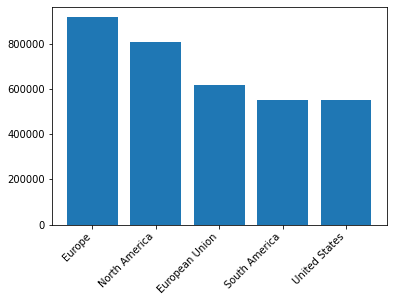

In [ ]:
top5_loc = df_world.loc[df_world.date == '2021-03-31', ['location', 'total_deaths']].sort_values(by='total_deaths',ascending=False)[1:6].reset_index(drop=True).copy()

fig, ax =plt.subplots()

ax.bar('location','total_deaths',data=top5_loc)
plt.xticks(rotation=45,ha="right")
plt.show()

##Como o vírus progrediu ou está progredindo?

Uma das maiores preocupações da organização mundial de saúde é a progressão do número de casos no mundo, o porquê disso é que como o vírus é muito transmisível e sua capacidade de afetar o sistema imune do indivíduo é muito forte e de uma só vez, o resultado que se obtém é o que vemos hoje após um ano de pandemia, superlotação dos leitos de UTIs dos hospitais para uma só doença, tendo assim pessoas morrendo por esperarem leitos ou por falta de insumos no tratamento da doença.
E para deixar vísivel a velocidade de propagação da doença foi criado esse gráficou de linha que esboça a evolução do número de mortes por dias no mundo, ou melhor, ao longo do tempo.


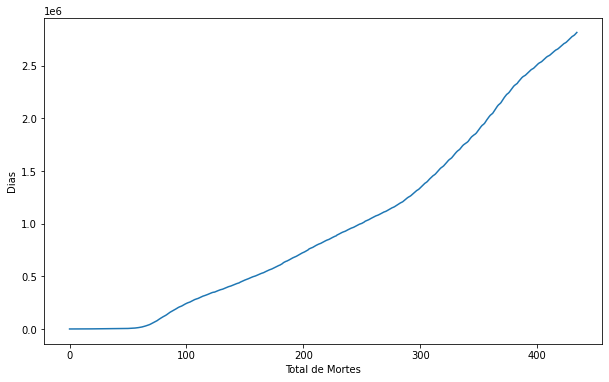

In [ ]:

df_world.loc[df_world.location == "World","total_deaths" ].reset_index(drop=True).plot(xlabel ="Total de Mortes", ylabel ="Dias",figsize=(10,6))


###Gráfico de Dispersão da renda per capita e o número de mortes

Uma outra relação  que pode ser apresentado atravéz de gráficos, é o total de mortes pela renda per capita das regiões. 
Países com um `gdp_per_capita` pequeno, apresentam um elevado número de mortes e isso é mostrado no gráfico de dispersão abaixo em que até o valor de `gdp_per_capita` de 20000 há vários países aglomerados e alguns com um número altíssimo de mortes, enquanto os de 60000 para cima é menor. 

Isso pode ser resultado de o fato que países com uma renda melhor conseguem testar mais pessoas e mais vezes para Covid-19, e que algumas regiões que estáo abaixo do 20000 `gdp` podem ser países que se destacam pela situação de pobreza mas com distânciamento social, ou seja, um país mais rural do que urbanizado.

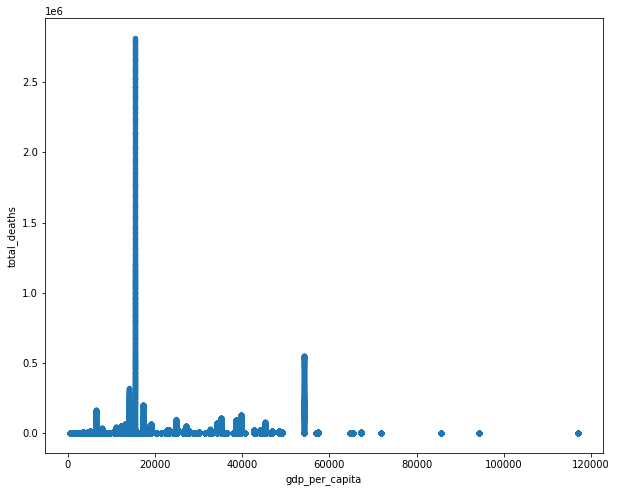

In [ ]:
df_world.plot(kind="scatter",x='gdp_per_capita',y='total_deaths',figsize=(10,8))

### Nesta seção é dedicado uma análise exploratória para a situação no dia 31/03/2021 do *Brasil*  

* Primeiro é necessário criar um DataFrame apenas do Brasil.


In [ ]:
df_Brasil = df_world.loc[df_world.location == "Brazil"].copy()

In [ ]:
df_Brasil.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
10077,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
10078,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
10079,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
10080,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
10081,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765


In [ ]:
df_Brasil.tail(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
10476,BRA,South America,Brazil,2021-03-31,12748747.0,90638.0,75533.714,321515.0,3869.0,2975.714,59977.336,426.413,355.353,1512.589,18.202,13.999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19155981.0,14921376.0,4234605.0,933422.0,458860.0,9.01,7.02,1.99,2159.0,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765


In [ ]:
df_Brasil.dtypes

iso_code                                         object
continent                                        object
location                                         object
date                                     datetime64[ns]
total_cases                                     float64
new_cases                                       float64
new_cases_smoothed                              float64
total_deaths                                    float64
new_deaths                                      float64
new_deaths_smoothed                             float64
total_cases_per_million                         float64
new_cases_per_million                           float64
new_cases_smoothed_per_million                  float64
total_deaths_per_million                        float64
new_deaths_per_million                          float64
new_deaths_smoothed_per_million                 float64
reproduction_rate                               float64
icu_patients                                    

Da análise exploratória dos dados pronta, sabe-se o que é relevante para a continuidade do projeto, como por exemplo: o número de mortes, a quantidade de casos e outras variáveis. Então o primeiro dado que quero destacar e descobrir é quando foi registrado a primeira morte.

* Primeira morte relatada no Brasil:

In [ ]:
#Primeira Morte de Covid-19 registrada no Brasil
df_Brasil.loc[df_Brasil['new_deaths'] == 1.0].head(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
10097,BRA,South America,Brazil,2020-03-17,321.0,121.0,41.429,1.0,1.0,0.143,1.51,0.569,0.195,0.005,0.005,0.001,2.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.87,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765


In [ ]:
print('A primeira morte registrada por Covid no Brasil aconteceu em {}'.format(df_Brasil.date.loc[10097]))

A primeira morte registrada por Covid no Brasil aconteceu em 2020-03-17 00:00:00


* Quanto tempo se passou até ser registrado a primeira morte, após o aparecimento do primeiro caso?

In [ ]:
#Data do primeiro caso que aconteceu no Brasil
df_Brasil.loc[df_Brasil['new_cases'] != 0.0].head(1)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
10077,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765


In [ ]:
#Identificando quanto tempo passou entre o primeiro caso e a primeira morte registrados por Covid-19 no país
from datetime import date
delta = df_Brasil.date.loc[10097] - df_Brasil.date.loc[10077]
print('Se passaram {} dias entre o primeiro caso e a primeira morte no Brasil.'.format(delta.days))

Se passaram 20 dias entre o primeiro caso e a primeira morte no Brasil.


In [ ]:
#Identificando o número de dias que se passou do primeiro caso até a data de hoje
thetha = df_Brasil.date.loc[10476] - df_Brasil.date.loc[10077]
print('Até agora já tivemos um total de {} dias de surgimentos de novos casos de Covid no Brasil'.format(thetha.days))

Até agora já tivemos um total de 399 dias de surgimentos de novos casos de Covid no Brasil


### Gráficos sobre a situação do Brasil


Para ajudar a apresentar o cenário que é enfrentado hoje no país, foi montado um gráfico para o número de **novos casos** e outro para o **novas mortes**, em ambos os gráficos temos duas escalas diferentes, a primeira de forma linear e a segunda na escala logatítimica para exibir o quão transmíssivel é o vírus da SARS-CoV-2 e suas variantes.

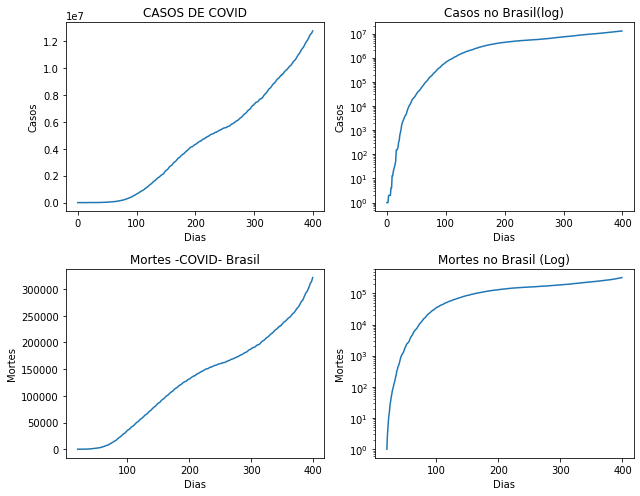

In [ ]:
# Gráficos na escala linear e algoritmica sobre a evolução da doença no país
x = list(range(400))
z = df_Brasil['total_cases']
z1 = df_Brasil['total_deaths']

fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows =2, ncols=2, figsize=(9,7))
ax1.set_title("CASOS DE COVID")
ax1.set_xlabel('Dias')
ax1.set_ylabel('Casos')
ax1.plot(x,z)

ax2.set_title("Casos no Brasil(log)")
ax2.set_xlabel("Dias")
ax2.set_ylabel('Casos')
ax2.set_yscale('log')
ax2.plot(x,z)

ax3.set_title('Mortes -COVID- Brasil')
ax3.set_xlabel('Dias')
ax3.set_ylabel('Mortes')
ax3.plot(x, z1)

ax4.set_title('Mortes no Brasil (Log)')
ax4.set_xlabel('Dias')
ax4.set_ylabel('Mortes')
ax4.set_yscale('log')
ax4.plot(x, z1)
plt.tight_layout()

## Conclusão 
Da análise dos dados feitas foi possível concluir os seguintes pontos: 
 
* A média de tempo que o paciente tem até a doença pioriar e poder resultar em óbito do indivíduo, que na média e de 14 dias e no primeiro caso foi de 20.
* E o registro da alta velocidade do surgimento de novos casos, provando que o vírus é muito transmissível.
* Os países que mais testam são os que conseguimos ter uma amostra mais detalhada, como EUA e UE e por isso eles possuem um peso relevante no número de casos e mortes, esses por usa vez também possuem um alto GDP per capita.

Esse dois pontos e mais o que os gráficos apresentam, trazem a conclusão de que sem a adoção de medidas restritivas e vacinação em massa para a população, não haverá leitos de UTIs para todos os brasilieiros e os médicos terão que escolher quem eles vão conseguir salvar.
